<a href="https://colab.research.google.com/github/M-Rasit/Image-Clustering-of-Planes-Dataset/blob/main/Image_Clustering_of_Planes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Libraries and Basic Understanding of Dataset**

In [ ]:
import os
from skimage.io import imread, imshow
import numpy as np
from skimage.transform import resize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from skimage.filters import prewitt_h,prewitt_v
import cv2 as cv

In [ ]:
fighter_jets_path = r"/content/drive/MyDrive/When I Study/Image Clustering of Planes/Plane Images/Fighter Jets"
passenger_plane_path = r"/content/drive/MyDrive/When I Study/Image Clustering of Planes/Plane Images/Passenger Planes"

In [ ]:
fighter_jets_image_names = os.listdir(fighter_jets_path)
passenger_plane_image_names = os.listdir(passenger_plane_path)

In [ ]:
image = imread(fighter_jets_path + "/" + fighter_jets_image_names[3])

In [ ]:
image_resized = resize(image, (500,500), anti_aliasing=True)

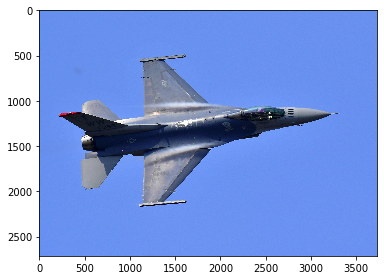

In [ ]:
imshow(image)

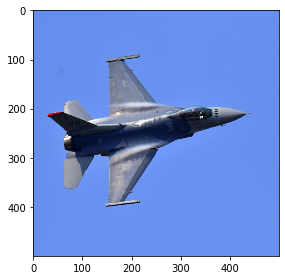

In [ ]:
imshow(image_resized)

In [ ]:
np.reshape(image_resized, (1, 750000))

array([[0.        , 0.        , 0.        , ..., 0.81859633, 0.83137255,
        0.80784314]])

# **Clustering Without Preprocessing**

In [ ]:
data = dict()
for image_name in fighter_jets_image_names:
  image = imread(fighter_jets_path + "/" + image_name)
  image = resize(image, (500,500), anti_aliasing=True)
  image = np.reshape(image, (1, 750000))
  data["fighter_" + image_name] = image
for image_name in passenger_plane_image_names:
  image = imread(passenger_plane_path + "/" + image_name)
  image = resize(image, (500,500), anti_aliasing=True)
  image = np.reshape(image, (1, 750000))
  data["passenger_" + image_name] = image

In [ ]:
len(data)

100

In [ ]:
features = np.array(list(data.values()))
features = features.reshape(-1, 750000)
print(features.shape)

(400, 750000)


In [ ]:
kmeans = KMeans(n_clusters=2 , random_state=1)
kmeans.fit(features)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
fighter_jets_predicted = kmeans.labels_[:50]
print("Figter Jets Cluster Count")
print("Cluster 1:", np.sum(fighter_jets_predicted))
print("Cluster 0:", 50 - np.sum(fighter_jets_predicted))
passenger_planes_predicted = kmeans.labels_[50:]
print("Passenger Planes Cluster Count")
print("Cluster 1:", np.sum(passenger_planes_predicted))
print("Cluster 0:", 50 - np.sum(passenger_planes_predicted))

Figter Jets Cluster Count
Cluster 1: 25
Cluster 0: 25
Passenger Planes Cluster Count
Cluster 1: 29
Cluster 0: 21


**PCA**

In [ ]:
pca = PCA(n_components=100 , random_state=1)
pca.fit(features)
features_pca = pca.transform(features)

In [ ]:
kmeans = KMeans(n_clusters=2 , random_state=1)
kmeans.fit(features_pca)

KMeans(n_clusters=2, random_state=1)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
fighter_jets_predicted = kmeans.labels_[:50]
print("Figter Jets Cluster Count")
print("Cluster 1:", sum(fighter_jets_predicted))
print("Cluster 0:", 50 - sum(fighter_jets_predicted))
passenger_planes_predicted = kmeans.labels_[50:]
print("Passenger Planes Cluster Count")
print("Cluster 1:", sum(passenger_planes_predicted))
print("Cluster 0:", 50 - sum(passenger_planes_predicted))

Figter Jets Cluster Count
Cluster 1: 25
Cluster 0: 25
Passenger Planes Cluster Count
Cluster 1: 29
Cluster 0: 21


# **Greyscale Pixel Values**



In [ ]:
data = dict()
for image_name in fighter_jets_image_names:
  image = imread(fighter_jets_path + "/" + image_name, as_gray=True)
  image = resize(image, (500,500), anti_aliasing=True)
  image = np.reshape(image, (1, 250000))
  data["fighter_" + image_name] = image
for image_name in passenger_plane_image_names:
  image = imread(passenger_plane_path + "/" + image_name, as_gray=True)
  image = resize(image, (500,500), anti_aliasing=True)
  image = np.reshape(image, (1, 250000))
  data["passenger_" + image_name] = image

In [ ]:
features = np.array(list(data.values()))
features = features.reshape(-1, 250000)
print(features.shape)

(100, 250000)


In [ ]:
kmeans = KMeans(n_clusters=2 , random_state=1)
kmeans.fit(features)

KMeans(n_clusters=2, random_state=1)

In [ ]:
fighter_jets_predicted = kmeans.labels_[:50]
print("Figter Jets Cluster Count")
print("Cluster 1:", np.sum(fighter_jets_predicted))
print("Cluster 0:", 50 - np.sum(fighter_jets_predicted))
passenger_planes_predicted = kmeans.labels_[50:]
print("Passenger Planes Cluster Count")
print("Cluster 1:", np.sum(passenger_planes_predicted))
print("Cluster 0:", 50 - np.sum(passenger_planes_predicted))

Figter Jets Cluster Count
Cluster 1: 25
Cluster 0: 25
Passenger Planes Cluster Count
Cluster 1: 21
Cluster 0: 29


PCA

In [ ]:
pca = PCA(n_components=100 , random_state=1)
pca.fit(features)
features_pca = pca.transform(features)

In [ ]:
kmeans = KMeans(n_clusters=2 , random_state=1)
kmeans.fit(features_pca)

KMeans(n_clusters=2, random_state=1)

In [ ]:
fighter_jets_predicted = kmeans.labels_[:50]
print("Figter Jets Cluster Count")
print("Cluster 1:", np.sum(fighter_jets_predicted))
print("Cluster 0:", 50 - np.sum(fighter_jets_predicted))
passenger_planes_predicted = kmeans.labels_[50:]
print("Passenger Planes Cluster Count")
print("Cluster 1:", np.sum(passenger_planes_predicted))
print("Cluster 0:", 50 - np.sum(passenger_planes_predicted))

Figter Jets Cluster Count
Cluster 1: 25
Cluster 0: 25
Passenger Planes Cluster Count
Cluster 1: 21
Cluster 0: 29


# **Mean Pixel Value**


In [ ]:
data = dict()
for image_name in fighter_jets_image_names:
  image = imread(fighter_jets_path + "/" + image_name)
  image = resize(image, (500,500), anti_aliasing=True)
  feature_matrix = np.zeros((500, 500))
  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)
  image = np.reshape(feature_matrix, (500*500)) 
  data["fighter_" + image_name] = image
for image_name in passenger_plane_image_names:
  image = imread(passenger_plane_path + "/" + image_name)
  image = resize(image, (500,500), anti_aliasing=True)
  feature_matrix = np.zeros((500, 500))
  for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)
  image = np.reshape(feature_matrix, (500*500)) 
  data["passenger_" + image_name] = image

In [ ]:
features = np.array(list(data.values()))
features = features.reshape(-1, 250000)
print(features.shape)

(100, 250000)


In [ ]:
kmeans = KMeans(n_clusters=2 , random_state=1)
kmeans.fit(features)

KMeans(n_clusters=2, random_state=1)

In [ ]:
fighter_jets_predicted = kmeans.labels_[:50]
print("Figter Jets Cluster Count")
print("Cluster 1:", np.sum(fighter_jets_predicted))
print("Cluster 0:", 50 - np.sum(fighter_jets_predicted))
passenger_planes_predicted = kmeans.labels_[50:]
print("Passenger Planes Cluster Count")
print("Cluster 1:", np.sum(passenger_planes_predicted))
print("Cluster 0:", 50 - np.sum(passenger_planes_predicted))

Figter Jets Cluster Count
Cluster 1: 0
Cluster 0: 50
Passenger Planes Cluster Count
Cluster 1: 3
Cluster 0: 47


**PCA**

In [ ]:
pca = PCA(n_components=100 , random_state=1)
pca.fit(features)
features_pca = pca.transform(features)

In [ ]:
kmeans = KMeans(n_clusters=2 , random_state=1)
kmeans.fit(features_pca)

KMeans(n_clusters=2, random_state=1)

In [ ]:
fighter_jets_predicted = kmeans.labels_[:50]
print("Figter Jets Cluster Count")
print("Cluster 1:", np.sum(fighter_jets_predicted))
print("Cluster 0:", 50 - np.sum(fighter_jets_predicted))
passenger_planes_predicted = kmeans.labels_[50:]
print("Passenger Planes Cluster Count")
print("Cluster 1:", np.sum(passenger_planes_predicted))
print("Cluster 0:", 50 - np.sum(passenger_planes_predicted))

Figter Jets Cluster Count
Cluster 1: 0
Cluster 0: 50
Passenger Planes Cluster Count
Cluster 1: 3
Cluster 0: 47


# **Extracting Edge Features (Horizontal)**


In [ ]:
data = dict()
for image_name in fighter_jets_image_names:
  image = imread(fighter_jets_path + "/" + image_name, as_gray=True)
  image = resize(image, (500,500), anti_aliasing=True)
  image = prewitt_h(image)
  image = np.reshape(image, (1, 250000))
  data["fighter_" + image_name] = image
for image_name in passenger_plane_image_names:
  image = imread(passenger_plane_path + "/" + image_name, as_gray=True)
  image = resize(image, (500,500), anti_aliasing=True)
  image = prewitt_h(image)
  image = np.reshape(image, (1, 250000))
  data["passenger_" + image_name] = image

In [ ]:
features = np.array(list(data.values()))
features = features.reshape(-1, 250000)
print(features.shape)

(100, 250000)


In [ ]:
kmeans = KMeans(n_clusters=2 , random_state=1)
kmeans.fit(features)

KMeans(n_clusters=2, random_state=1)

In [ ]:
fighter_jets_predicted = kmeans.labels_[:50]
print("Figter Jets Cluster Count")
print("Cluster 1:", np.sum(fighter_jets_predicted))
print("Cluster 0:", 50 - np.sum(fighter_jets_predicted))
passenger_planes_predicted = kmeans.labels_[50:]
print("Passenger Planes Cluster Count")
print("Cluster 1:", np.sum(passenger_planes_predicted))
print("Cluster 0:", 50 - np.sum(passenger_planes_predicted))

Figter Jets Cluster Count
Cluster 1: 0
Cluster 0: 50
Passenger Planes Cluster Count
Cluster 1: 1
Cluster 0: 49


**PCA**

In [ ]:
pca = PCA(n_components=100 , random_state=1)
pca.fit(features)
features_pca = pca.transform(features)

In [ ]:
kmeans = KMeans(n_clusters=2 , random_state=1)
kmeans.fit(features_pca)

KMeans(n_clusters=2, random_state=1)

In [ ]:
fighter_jets_predicted = kmeans.labels_[:50]
print("Figter Jets Cluster Count")
print("Cluster 1:", np.sum(fighter_jets_predicted))
print("Cluster 0:", 50 - np.sum(fighter_jets_predicted))
passenger_planes_predicted = kmeans.labels_[50:]
print("Passenger Planes Cluster Count")
print("Cluster 1:", np.sum(passenger_planes_predicted))
print("Cluster 0:", 50 - np.sum(passenger_planes_predicted))

Figter Jets Cluster Count
Cluster 1: 0
Cluster 0: 50
Passenger Planes Cluster Count
Cluster 1: 1
Cluster 0: 49


# **Extracting Edge Features (Vertical)**


In [ ]:
data = dict()
for image_name in fighter_jets_image_names:
  image = imread(fighter_jets_path + "/" + image_name, as_gray=True)
  image = resize(image, (500,500), anti_aliasing=True)
  image = prewitt_v(image)
  image = np.reshape(image, (1, 250000))
  data["fighter_" + image_name] = image
for image_name in passenger_plane_image_names:
  image = imread(passenger_plane_path + "/" + image_name, as_gray=True)
  image = resize(image, (500,500), anti_aliasing=True)
  image = prewitt_v(image)
  image = np.reshape(image, (1, 250000))
  data["passenger_" + image_name] = image

In [ ]:
features = np.array(list(data.values()))
features = features.reshape(-1, 250000)
print(features.shape)

(100, 250000)


In [ ]:
kmeans = KMeans(n_clusters=2 , random_state=1)
kmeans.fit(features)

KMeans(n_clusters=2, random_state=1)

In [ ]:
fighter_jets_predicted = kmeans.labels_[:50]
print("Figter Jets Cluster Count")
print("Cluster 1:", np.sum(fighter_jets_predicted))
print("Cluster 0:", 50 - np.sum(fighter_jets_predicted))
passenger_planes_predicted = kmeans.labels_[50:]
print("Passenger Planes Cluster Count")
print("Cluster 1:", np.sum(passenger_planes_predicted))
print("Cluster 0:", 50 - np.sum(passenger_planes_predicted))

Figter Jets Cluster Count
Cluster 1: 1
Cluster 0: 49
Passenger Planes Cluster Count
Cluster 1: 0
Cluster 0: 50


**PCA**

In [ ]:
pca = PCA(n_components=100 , random_state=1)
pca.fit(features)
features_pca = pca.transform(features)

In [ ]:
kmeans = KMeans(n_clusters=2 , random_state=1)
kmeans.fit(features_pca)

KMeans(n_clusters=2, random_state=1)

In [ ]:
fighter_jets_predicted = kmeans.labels_[:50]
print("Figter Jets Cluster Count")
print("Cluster 1:", np.sum(fighter_jets_predicted))
print("Cluster 0:", 50 - np.sum(fighter_jets_predicted))
passenger_planes_predicted = kmeans.labels_[50:]
print("Passenger Planes Cluster Count")
print("Cluster 1:", np.sum(passenger_planes_predicted))
print("Cluster 0:", 50 - np.sum(passenger_planes_predicted))

Figter Jets Cluster Count
Cluster 1: 1
Cluster 0: 49
Passenger Planes Cluster Count
Cluster 1: 0
Cluster 0: 50


## **OpenCV Canny Edge Detection**

In [ ]:
data = dict()
for image_name in fighter_jets_image_names:
  image = cv.imread(fighter_jets_path + "/" + image_name)
  image = cv.Canny(image, 50, 50)
  image = resize(image, (500,500), anti_aliasing=True)
  image = prewitt_v(image)
  image = np.reshape(image, (1, 250000))
  data["fighter_" + image_name] = image
for image_name in passenger_plane_image_names:
  image = cv.imread(passenger_plane_path + "/" + image_name)
  image = cv.Canny(image, 50, 50)
  image = resize(image, (500,500), anti_aliasing=True)
  image = prewitt_v(image)
  image = np.reshape(image, (1, 250000))
  data["passenger_" + image_name] = image

In [ ]:
features = np.array(list(data.values()))
features = features.reshape(-1, 250000)
print(features.shape)

(100, 250000)


In [ ]:
kmeans = KMeans(n_clusters=2 , random_state=1)
kmeans.fit(features)

KMeans(n_clusters=2, random_state=1)

In [ ]:
fighter_jets_predicted = kmeans.labels_[:50]
print("Figter Jets Cluster Count")
print("Cluster 1:", np.sum(fighter_jets_predicted))
print("Cluster 0:", 50 - np.sum(fighter_jets_predicted))
passenger_planes_predicted = kmeans.labels_[50:]
print("Passenger Planes Cluster Count")
print("Cluster 1:", np.sum(passenger_planes_predicted))
print("Cluster 0:", 50 - np.sum(passenger_planes_predicted))

Figter Jets Cluster Count
Cluster 1: 0
Cluster 0: 50
Passenger Planes Cluster Count
Cluster 1: 1
Cluster 0: 49


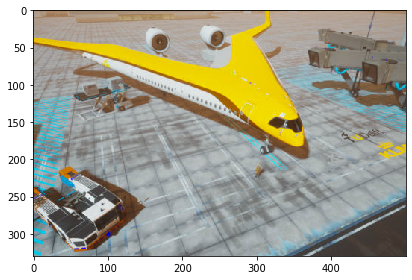

In [ ]:
image = cv.imread(passenger_plane_path + "/" + list(data.keys())[np.where(kmeans.labels_ == 1)[0][0]].split("_")[1])
imshow(image)